___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [4]:
df = pd.read_csv('Frozen_Dessert_Production.csv', index_col='DATE', parse_dates = True)
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [5]:
df.shape

(573, 1)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IPN31152N,573.000,109.896,27.951,58.660,88.936,107.643,128.278,196.174


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [7]:
df.columns

Index(['IPN31152N'], dtype='object')

In [8]:
df=df.rename(columns = {'IPN31152N':'Score'})
df


,Score
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Score   573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


# Preprocessing of Data

## Train Test Split

In [10]:
len(df)

573

In [11]:
test_size = 71

In [12]:
test_ind = len(df)- test_size
test_ind

502

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train

,Score
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2013-06-01,128.691
2013-07-01,112.369
2013-08-01,106.055


In [15]:
test

,Score
DATE,
2013-11-01,80.069
2013-12-01,67.803
2014-01-01,86.397
2014-02-01,101.731
2014-03-01,113.776
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


## Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
length = 32
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [22]:
len(generator)

470

In [23]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ],
         [0.01774221],
         [0.09850931],
         [0.15590133],
         [0.18358944],
         [0.20878908],
         [0.37150354],
         [0.3542551 ],
         [0.29817568],
         [0.23973867],
         [0.12104304],
         [0.05289938],
         [0.02087498],
         [0.03141355],
         [0.12133246],
         [0.18622481],
         [0.18855185],
         [0.23182893],
         [0.37263651],
         [0.32891584],
         [0.30809031]]]), array([[0.22409662]]))

In [24]:
X, y = generator[0]

In [25]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

Given the Array: 
[[[0.00947104]
  [0.06108982]
  [0.11326273]
  [0.14145625]
  [0.18982663]
  [0.30495972]
  [0.30154406]
  [0.27416065]
  [0.19736841]
  [0.08532665]
  [0.01561588]
  [0.        ]
  [0.01774221]
  [0.09850931]
  [0.15590133]
  [0.18358944]
  [0.20878908]
  [0.37150354]
  [0.3542551 ]
  [0.29817568]
  [0.23973867]
  [0.12104304]
  [0.05289938]
  [0.02087498]
  [0.03141355]
  [0.12133246]
  [0.18622481]
  [0.18855185]
  [0.23182893]
  [0.37263651]
  [0.32891584]
  [0.30809031]]]
Predict this y: 
[[0.22409662]]


In [ ]:
train_scaled[:10]

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665]])

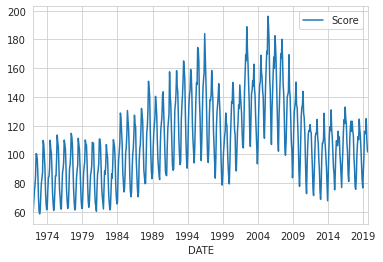

In [26]:
df.plot()

# Modelling & Model Performance

## with "tanh" activation function

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [28]:
n_features = 1

In [29]:
#define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 100, activation = "tanh", input_shape=(length, n_features))) # units are number of neuron 

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mse')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [33]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [38]:
 model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
470/470 [==============================] - 6s 12ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 2/120
470/470 [==============================] - 3s 6ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 3/120
470/470 [==============================] - 4s 8ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 4/120
470/470 [==============================] - 3s 6ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 5/120
470/470 [==============================] - 3s 5ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 6/120
470/470 [==============================] - 3s 5ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 7/120
470/470 [==============================] - 3s 5ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 8/120
470/470 [==============================] - 3s 5ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 9/120
470/470 [==============================] - 3s 5ms/step - loss: 0.0019 - val_loss: 0.0017


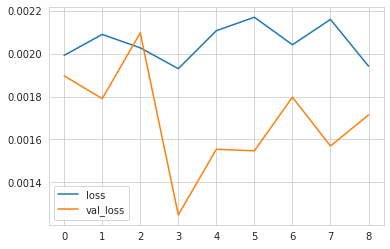

In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### Evaluation on Test Data

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [42]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [43]:
predictions_scaled

[array([0.17307316], dtype=float32),
 array([0.15340455], dtype=float32),
 array([0.20110379], dtype=float32),
 array([0.2897461], dtype=float32),
 array([0.34865206], dtype=float32),
 array([0.36655736], dtype=float32),
 array([0.4150648], dtype=float32),
 array([0.4338792], dtype=float32),
 array([0.37775996], dtype=float32),
 array([0.30707932], dtype=float32),
 array([0.22787379], dtype=float32),
 array([0.15505397], dtype=float32),
 array([0.11138585], dtype=float32),
 array([0.10939602], dtype=float32),
 array([0.1639404], dtype=float32),
 array([0.23841603], dtype=float32),
 array([0.2872863], dtype=float32),
 array([0.3253779], dtype=float32),
 array([0.3677637], dtype=float32),
 array([0.37198672], dtype=float32),
 array([0.32101288], dtype=float32),
 array([0.24659711], dtype=float32),
 array([0.16859436], dtype=float32),
 array([0.103419], dtype=float32),
 array([0.0683967], dtype=float32),
 array([0.0827481], dtype=float32),
 array([0.14559469], dtype=float32),
 array([0.21

In [44]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.36691450591785735 
mae: 0.07936307342808747 
mse: 0.008952530957373729 
rmse: 0.0946178152219429


### Inverse Transformation and Comparing

In [51]:
predictions = scaler.inverse_transform(predictions_scaled)

In [56]:
compare = test[:32]

In [57]:
compare['Predictions'] = predictions

In [58]:
compare

,Score,Predictions
DATE,,
2013-11-01,80.069,82.460
2013-12-01,67.803,79.755
2014-01-01,86.397,86.314
2014-02-01,101.731,98.504
2014-03-01,113.776,106.604
2014-04-01,119.353,109.067
2014-05-01,116.631,115.737
2014-06-01,131.040,118.324
2014-07-01,117.272,110.607


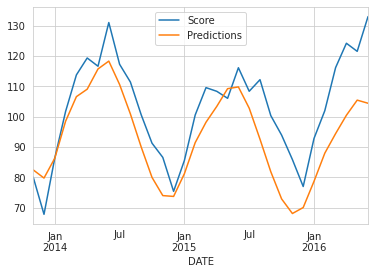

In [59]:
compare.plot()

## with "relu" activation function

In [60]:
n_features = train_scaled.shape[1]

In [61]:
model_relu = Sequential()
model_relu.add(LSTM(150, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model_relu.add(LSTM(50, activation = 'relu'))
model_relu.add(Dense(1))
model_relu.compile(optimizer = 'adam', loss = 'mse')

In [62]:
model_relu.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32, 150)           91200     
                                                                 
 lstm_1 (LSTM)               (None, 50)                40200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 131,451
Trainable params: 131,451
Non-trainable params: 0
_________________________________________________________________


In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [65]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [66]:
len(validation_generator)

39

In [68]:
model_relu.fit(x = generator,
          epochs = 128,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/128
470/470 [==============================] - 12s 25ms/step - loss: 0.0028 - val_loss: 0.0035
Epoch 2/128
470/470 [==============================] - 12s 25ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 3/128
470/470 [==============================] - 12s 25ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 4/128
470/470 [==============================] - 11s 24ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 5/128
470/470 [==============================] - 11s 24ms/step - loss: 0.0025 - val_loss: 0.0044
Epoch 6/128
470/470 [==============================] - 11s 24ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 7/128
470/470 [==============================] - 12s 24ms/step - loss: 0.0025 - val_loss: 0.0056
Epoch 8/128
470/470 [==============================] - 11s 24ms/step - loss: 0.0026 - val_loss: 0.0037


In [106]:
loss_df = pd.DataFrame(model_relu.history.history)
loss_df.plot()

TypeError: ignored

### Evaluation on Test Data

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [78]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [79]:
predictions_scaled1 = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model_relu.predict(current_batch)
    
    # store prediction
    predictions_scaled1.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [80]:
predictions_scaled1

[array([0.11973652], dtype=float32),
 array([0.10430399], dtype=float32),
 array([0.170442], dtype=float32),
 array([0.25617552], dtype=float32),
 array([0.31416297], dtype=float32),
 array([0.36041385], dtype=float32),
 array([0.39989993], dtype=float32),
 array([0.42699927], dtype=float32),
 array([0.4227332], dtype=float32),
 array([0.3673121], dtype=float32),
 array([0.2769973], dtype=float32),
 array([0.17893767], dtype=float32),
 array([0.10137211], dtype=float32),
 array([0.07966684], dtype=float32),
 array([0.14122128], dtype=float32),
 array([0.2297189], dtype=float32),
 array([0.28803775], dtype=float32),
 array([0.3347778], dtype=float32),
 array([0.37577114], dtype=float32),
 array([0.40245533], dtype=float32),
 array([0.39788207], dtype=float32),
 array([0.34387034], dtype=float32),
 array([0.2573533], dtype=float32),
 array([0.16432127], dtype=float32),
 array([0.09023741], dtype=float32),
 array([0.06869116], dtype=float32),
 array([0.12275991], dtype=float32),
 array([0

In [81]:
eval_metrics(test_scaled[:length], predictions_scaled1)

r2_score: 0.5544525937609958 
mae: 0.06765447396194424 
mse: 0.006300534421682251 
rmse: 0.0793759058007041


### Inverse Transformation and Comparing

In [82]:
predictions = scaler.inverse_transform(predictions_scaled1)

In [87]:
compare = test[:32]

In [88]:
compare['Predictions'] = predictions

In [89]:
compare

,Score,Predictions
DATE,,
2013-11-01,80.069,75.125
2013-12-01,67.803,73.003
2014-01-01,86.397,82.098
2014-02-01,101.731,93.887
2014-03-01,113.776,101.862
2014-04-01,119.353,108.222
2014-05-01,116.631,113.652
2014-06-01,131.040,117.378
2014-07-01,117.272,116.791


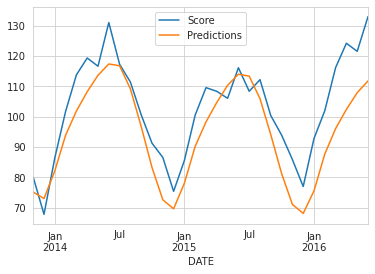

In [90]:
compare.plot()

# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [91]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [92]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [93]:
len(df)

573

In [94]:
len(generator)

541

In [95]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model_relu.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [96]:
forecast = scaler.inverse_transform(forecast)

In [97]:
forecast

array([[ 85.25877032],
       [ 75.18025188],
       [ 72.74750252],
       [ 83.30611365],
       [ 96.05547653],
       [103.50375787],
       [109.60444166],
       [114.5901887 ],
       [117.5172086 ],
       [115.26373339],
       [106.44003978],
       [ 93.7635312 ],
       [ 81.02195497],
       [ 71.84196093],
       [ 72.04902008],
       [ 82.93785458],
       [ 94.65463882],
       [102.20214249],
       [108.14644178],
       [113.1347994 ],
       [116.08792505],
       [113.60556349],
       [104.53839382],
       [ 91.81381707],
       [ 79.16566827],
       [ 70.26155502],
       [ 69.70194942],
       [ 79.72621236],
       [ 91.20391385],
       [ 98.84420563],
       [105.04139462],
       [110.22947146]])

In [98]:
df

,Score
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [99]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')

In [100]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [101]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [102]:
forecast_df

,Forecast
2019-10-01,85.259
2019-11-01,75.180
2019-12-01,72.748
2020-01-01,83.306
2020-02-01,96.055
2020-03-01,103.504
2020-04-01,109.604
2020-05-01,114.590
2020-06-01,117.517
2020-07-01,115.264


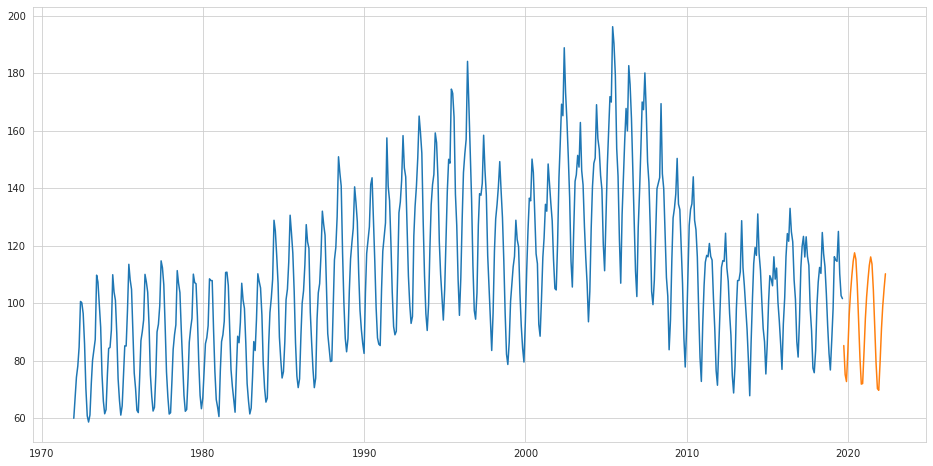

In [107]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Score'])
plt.plot(forecast_df.index, forecast_df['Forecast']);

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___